In [91]:
# Jump-Start Example: Python analysis of MSPA Software Survey

# Update 2017-09-21 by Tom Miller and Kelsey O'Neill
# Update 2018-06-30 by Tom Miller v005 transformation code added

# tested under Python 3.6.1 :: Anaconda custom (x86_64)
# on Windows 10.0 and Mac OS Sierra 10.12.2 

# shows how to read in data from a comma-delimited text file
# manipuate data, create new count variables, define categorical variables,
# work with dictionaries and lambda mapping functions for recoding data 

# visualizations in this program are routed to external pdf files
# so they may be included in printed or electronic reports

# prepare for Python version 3x features and functions
# these two lines of code are needed for Python 2.7 only
# commented out for Python 3.x versions
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

# correlation heat map setup for seaborn
%matplotlib inline
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='RdBu', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

In [8]:
# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address
valid_survey_input = pd.read_csv('mspa-survey-data.csv')

In [9]:
valid_survey_input.head() #checking to see what the dataset looked like

,RespondentID,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
0,5135740122,0,0,0,50,50,0,0,0,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5133300037,10,10,50,30,0,25,25,30,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
2,5132253300,20,0,40,40,0,0,0,40,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
3,5132096630,10,10,25,35,20,10,10,25,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
4,5131990362,20,0,0,70,10,20,0,0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018


In [10]:
# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

# examine the structure of the DataFrame object
print('\nContents of initial survey data ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
print(valid_survey_input.columns)

# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(valid_survey_input)) 


Contents of initial survey data ---------------

Number of Respondents = 207
Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')
              Personal_JavaScalaSpark  Personal

In [11]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})


# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']

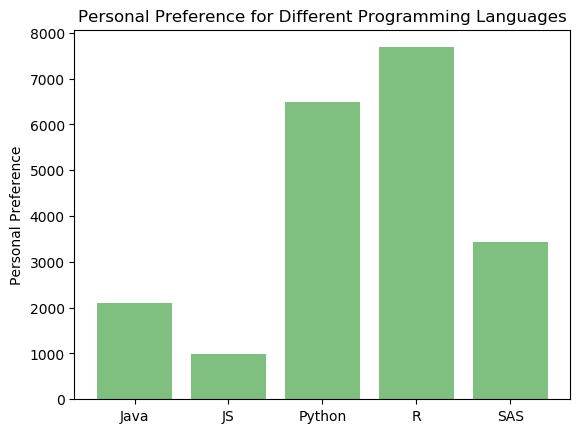

In [85]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Java', 'JS', 'Python', 'R', 'SAS')
y_pos = np.arange(len(objects))
preference = [survey_df['My_Java'].sum(), survey_df['My_JS'].sum(), 
              survey_df['My_Python'].sum(), survey_df['My_R'].sum(), survey_df['My_SAS'].sum()]
 
plt.bar(y_pos, preference, align='center', alpha=0.5, color = "green")
plt.xticks(y_pos, objects)
plt.ylabel('Personal Preference')
plt.title('Personal Preference for Different Programming Languages')
plt.savefig('plot-bar-personal-programming.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
plt.show()



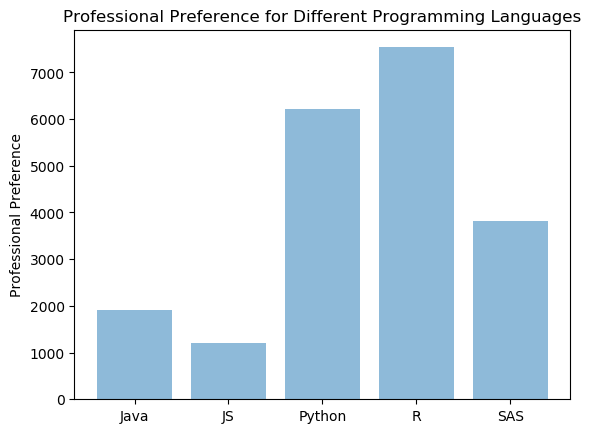

In [86]:
objects = ('Java', 'JS', 'Python', 'R', 'SAS')
y_pos = np.arange(len(objects))
preference = [survey_df['Prof_Java'].sum(), survey_df['Prof_JS'].sum(), 
              survey_df['Prof_Python'].sum(), survey_df['Prof_R'].sum(), survey_df['Prof_SAS'].sum()]
 
plt.bar(y_pos, preference, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Professional Preference')
plt.title('Professional Preference for Different Programming Languages')
plt.savefig('plot-bar-professional-programming.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
 
plt.show()

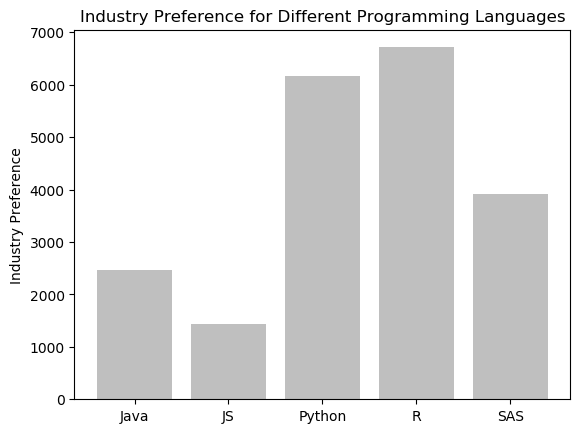

In [87]:
objects = ('Java', 'JS', 'Python', 'R', 'SAS')
y_pos = np.arange(len(objects))
preference = [survey_df['Ind_Java'].sum(), survey_df['Ind_JS'].sum(), 
              survey_df['Ind_Python'].sum(), survey_df['Ind_R'].sum(), survey_df['Ind_SAS'].sum()]
 
plt.bar(y_pos, preference, align='center', alpha=0.5, color = "grey")
plt.xticks(y_pos, objects)
plt.ylabel('Industry Preference')
plt.title('Industry Preference for Different Programming Languages')
plt.savefig('plot-bar-industry-programming.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
 
plt.show()

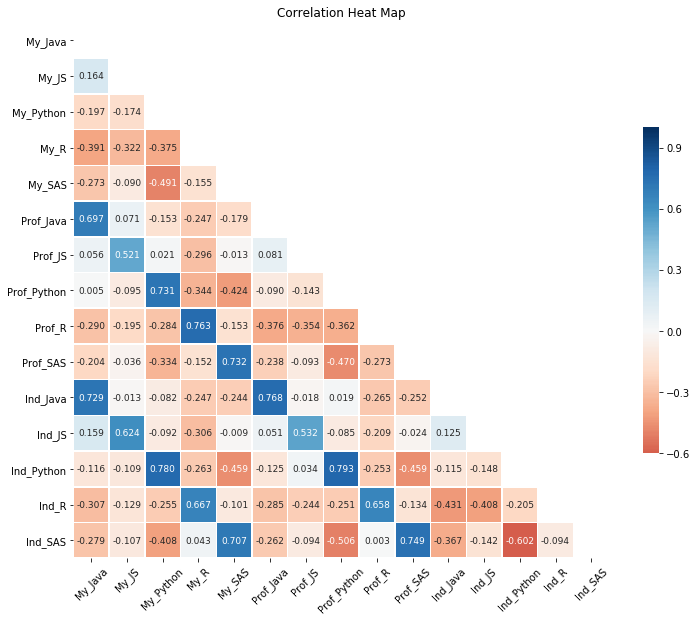

In [92]:
#seem to be very similar.... correlation plot?
%matplotlib inline
corr_chart(df_corr = software_df) 

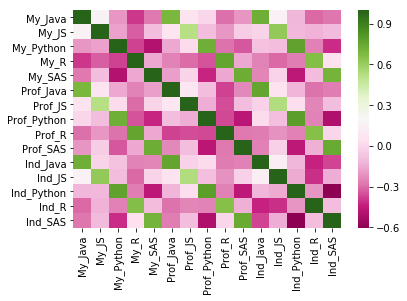

In [25]:
import seaborn as sns
corr = software_df.corr()
sns.heatmap(corr, cmap="PiYG",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [26]:
#table of preference sums
software_df.describe()

,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000


In [32]:
#table of sums
print(software_df.sum(),)

My_Java        2098
My_JS           993
My_Python      6480
My_R           7685
My_SAS         3444
Prof_Java      1915
Prof_JS        1209
Prof_Python    6216
Prof_R         7538
Prof_SAS       3822
Ind_Java       2472
Ind_JS         1442
Ind_Python     6163
Ind_R          6714
Ind_SAS        3909
dtype: int64


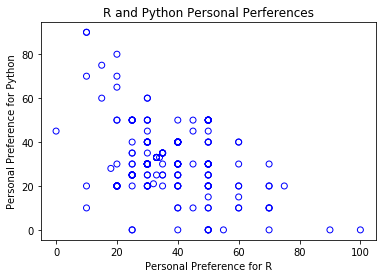

In [37]:
# single scatter plot example - R vs. Python personal preferences
%matplotlib inline
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Personal Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python-personal.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

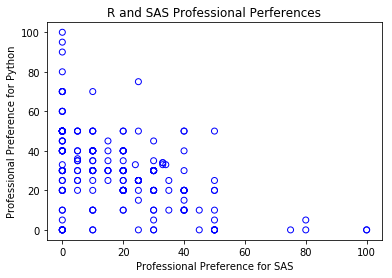

In [38]:
# single scatter plot example - SAS vs. Python professional preferences
%matplotlib inline
fig, axis = plt.subplots()
axis.set_xlabel('Professional Preference for SAS')
axis.set_ylabel('Professional Preference for Python')
plt.title('R and SAS Professional Perferences')
scatter_plot = axis.scatter(survey_df['Prof_SAS'], 
    survey_df['Prof_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-SAS-python-professional.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
#Less at odds than R vs. Python

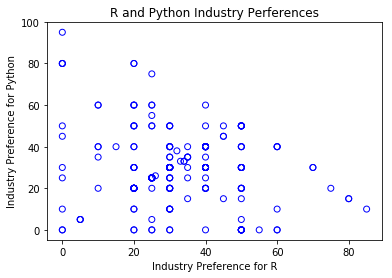

In [40]:
# single scatter plot example - R vs. Python industry preferences
%matplotlib inline
fig, axis = plt.subplots()
axis.set_xlabel('Industry Preference for R')
axis.set_ylabel('Industry Preference for Python')
plt.title('R and Python Industry Perferences')
scatter_plot = axis.scatter(survey_df['Ind_R'], 
    survey_df['Ind_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python-industry.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 

In [46]:
sixorgreater = survey_df[survey_df['Courses_Completed'] >= 6]
sixorless = survey_df[survey_df['Courses_Completed'] < 6]

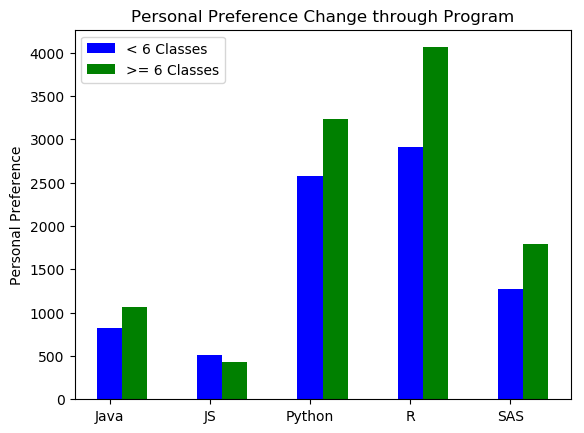

In [88]:
#see if personal preference changes halfway through the program 
import numpy as np
import matplotlib.pyplot as plt


objects = ('Java', 'JS', 'Python', 'R', 'SAS')
y_pos = np.arange(len(objects))
preference = [sixorless['My_Java'].sum(), sixorless['My_JS'].sum(), 
              sixorless['My_Python'].sum(), sixorless['My_R'].sum(), sixorless['My_SAS'].sum()],[sixorgreater['My_Java'].sum(), sixorgreater['My_JS'].sum(), 
              sixorgreater['My_Python'].sum(), sixorgreater['My_R'].sum(), sixorgreater['My_SAS'].sum()]
 
plt.bar(y_pos + 0.00, preference[0], color = 'b', width = 0.25, label = "< 6 Classes")
plt.bar(y_pos + 0.25, preference[1], color = 'g', width = 0.25, label = ">= 6 Classes")
plt.xticks(y_pos, objects)
plt.ylabel('Personal Preference')
plt.title('Personal Preference Change through Program')
plt.legend(loc='upper left')
plt.savefig('plot-bar-changein-personal.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
plt.show()



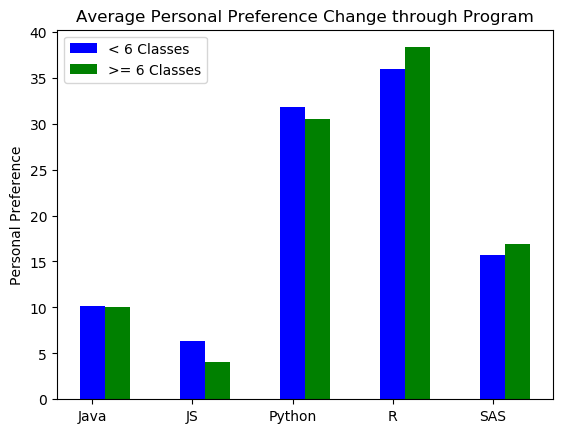

In [89]:
#plt.show()

objects = ('Java', 'JS', 'Python', 'R', 'SAS')
y_pos = np.arange(len(objects))
preference = [sixorless['My_Java'].mean(), sixorless['My_JS'].mean(), 
              sixorless['My_Python'].mean(), sixorless['My_R'].mean(), sixorless['My_SAS'].mean()],[sixorgreater['My_Java'].mean(), sixorgreater['My_JS'].mean(), 
              sixorgreater['My_Python'].mean(), sixorgreater['My_R'].mean(), sixorgreater['My_SAS'].mean()]
 
plt.bar(y_pos + 0.00, preference[0], color = 'b', width = 0.25, label = "< 6 Classes")
plt.bar(y_pos + 0.25, preference[1], color = 'g', width = 0.25, label = ">= 6 Classes")
plt.xticks(y_pos, objects)
plt.ylabel('Personal Preference')
plt.title('Average Personal Preference Change through Program')
plt.savefig('plot-bar-avg-changein-personal.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
plt.legend(loc='upper left')
plt.show()

In [65]:
#Learn about student interest in potential new courses

interest_df = survey_df.loc[:,'Python_Course_Interest':'Systems_Analysis_Course_Interest']
interest_df.head()
print('\nDescriptive Statistics for New Course Interest')
interest_df.describe()


Descriptive Statistics for New Course Interest


,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
count,206.000000,200.000000,203.000000,200.000000
mean,73.529126,58.045000,55.201970,53.630000
std,29.835429,32.588079,34.147954,33.539493
min,0.000000,0.000000,0.000000,0.000000
25%,53.000000,29.500000,25.000000,21.500000
50%,82.500000,60.000000,60.000000,51.500000
75%,100.000000,89.250000,85.000000,80.250000
max,100.000000,100.000000,100.000000,100.000000


In [63]:
#table of sums for interest in new classes
print('\nSum of Interest for New Classes')
print(interest_df.sum(),)

print('\nAverage Interest in New Classes')
print(interest_df.mean())


Sum of Interest for New Classes
Python_Course_Interest              15147.0
Foundations_DE_Course_Interest      11609.0
Analytics_App_Course_Interest       11206.0
Systems_Analysis_Course_Interest    10726.0
dtype: float64

Average Interest in New Classes
Python_Course_Interest              73.529126
Foundations_DE_Course_Interest      58.045000
Analytics_App_Course_Interest       55.201970
Systems_Analysis_Course_Interest    53.630000
dtype: float64


In [66]:
# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())


Descriptive statistics for courses completed ---------------
count    187.000000
mean       6.342246
std        3.170849
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Courses_Completed, dtype: float64


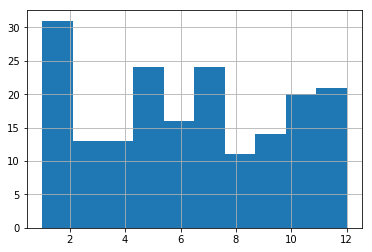

In [67]:
survey_df['Courses_Completed'].hist()

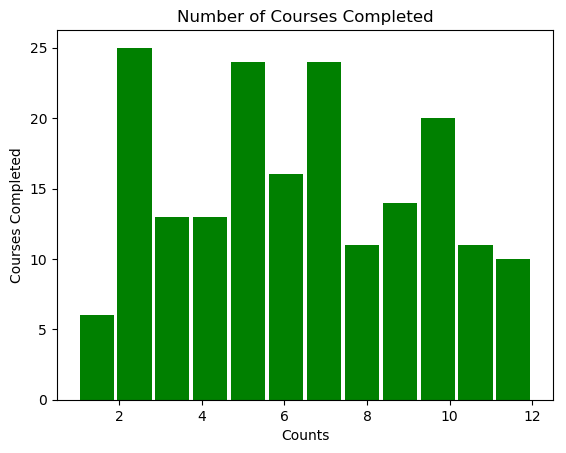

In [90]:
survey_df['Courses_Completed'].plot.hist(grid=False, bins=12, rwidth=0.9,
                   color='green')
plt.title('Number of Courses Completed')
plt.xlabel('Counts')
plt.ylabel('Courses Completed')
plt.savefig('plot-bar-courses-completed.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
plt.figure()

Text(0,0.5,'Courses Completed')

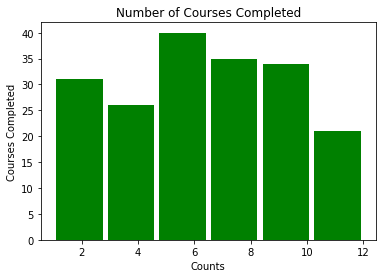

In [72]:
survey_df['Courses_Completed'].plot.hist(grid=False, bins=6, rwidth=0.9,
                   color='green')
plt.title('Number of Courses Completed')
plt.xlabel('Counts')
plt.ylabel('Courses Completed')

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Courses_Completed'].dropna()



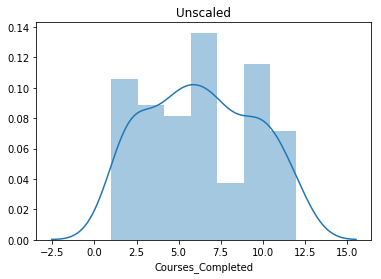

In [75]:
#unscaled completed courses transformation
unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


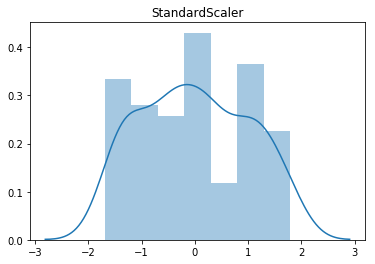

In [82]:
#standard scaler transformation 
standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X.reshape(-1,1))).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


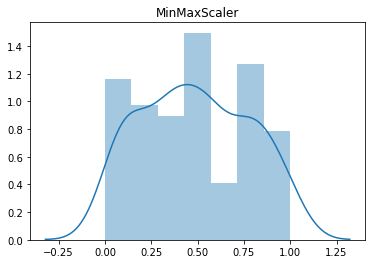

In [81]:
#minmax scalar transformation
minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.reshape(-1,1))).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 